# <b> Exploratory Data Analysis on Red Wine Dataset </b>

The dataset is obtained through UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/wine+quality

### <b> Question 1: What does our data look like? </b>

How does our data look? Are there any skewness in our data? What is the interquartile range? How can we visualize it?


To check for exact numerical value of our data, we can do the <i>.describe() method</i>, which provides a summary that describes the follwing: the number of rows (listed as count), mean, standard deviation, minimum value, maximum value, lower quartile, median, upper quartile and the highest value for each of our feature

In order to visualize it, we can do a <i> boxplot </i>. It provides as a visual representation on how each of our data compares with one and another

### Question 2: What is the relationship between each chemical property with the quality of our wine?

After checking the first few lines of our data, you will notice that we have a lot of different chemical properties. We can quickly check the correlation between each chemical property with our dependent variable (which is our quality) by doing a <i>correlation matrix </i>

### Question 3: Are there any other interesting relationship in our data?

One of important aspect on why we do EDA is uncovering any relationship that we could not catch just by glancing our data. Here we can try to think on how one independent variable is correlation with another and whether there is an explanation for that. Sometimes a <i> pairplot </i> would be useful to uncover this.

## <b> Data Preparation </b>

The very first thing that we have to do is to load our dataset and necessary packages for our data. 

In [78]:
#Loading all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

Let's try to load and look at our data:

In [79]:
#Loading our data
data = pd.read_csv("winequality-red.csv", low_memory=False, sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


So what do we have here? We see that our columns have 1599 rows and 12 columns with one being our dependent variable (quality). We also see that our data is consisted of different chemical properties such as volatile acidity (which refers to acetic acid), citric acid, residual sugar, etc. 

For clarification and elaboration regarding each variables, take a look at this paper: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [80]:
#Checking for any null value 
null_col = np.sum(data.isnull())
null_col
#We can see that there is no null value in our data. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [81]:
#Looking at the unique value of our dependent variable that are available on the dataset
target= data["quality"]
print(np.unique(target))


[3 4 5 6 7 8]


So based on our quality column, the data ranges from 3-8 where quality can be from 1-10. So we only have information for data that falls under those quality category. 

## <b> Q1: What does our data look like? </b>

Let's try to look at a "numerical" description of our data

In [82]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


For clarification, I did look up the unit on Cortez et al. 2009 paper. It is under g/dm^3 which also equals to g/L. So imagine one litre of wine containing around 7.9 g of tartaric acid (which is known as "fixed acidity", it was also on the paper). 

When we are talking about chemistry, a lot of them are concentration dependent. So it's important to pay attention to the unit of independent variable (this might be just coming from someone who teaches organic chemistry, so I pay attention a lot to concentration and identity of each chemical)

To assist our numerical description, we can visualize our data through box plot



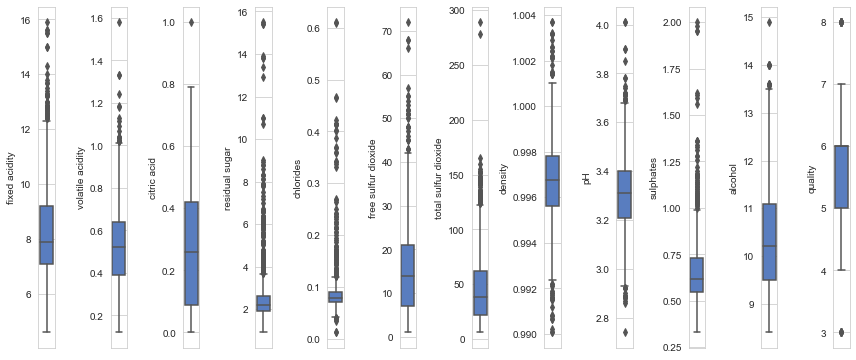

In [83]:
col_val = data.columns.values
col_num=12
row_num = len(col_val)-1/col_num
plt.figure(figsize=(col_num,5*row_num))
def box_plot(col_val, col_num, row_num):
    """This function will create a boxplot
    Parameters:
    col_val: The name of your columns
    col_num: Number of columns
    row_num: Number of rows
    
    Returns:
    A boxplot that has all your variables in it
    """
    for i in range(0,len(col_val)):
        plt.subplot(row_num + 1,col_num,i+1)
        sns.set_style("whitegrid")
        sns.boxplot(data[col_val[i]],palette="muted",orient="v")
        plt.tight_layout()

box_plot(col_val, col_num, row_num)

We can see that our box plot is really small for residual sugar and chloride and it is relatively large for our citric acid. The values that fall within the boxplot indicate 50% of our dataset, meaning for a small box plot, 50% of our dataset falls within a smaller range of values relative to our other data. Some of them (such as volatile acidity, citric acid, chlorides, sulphates) work on concentration below 1 g/L, which is small compared to let's say tartaric acid. This will be relevant to our future discussion (if you really want to know, please feel free to jump to correlation matrix section)

Let's try to look at the distribution of our data:

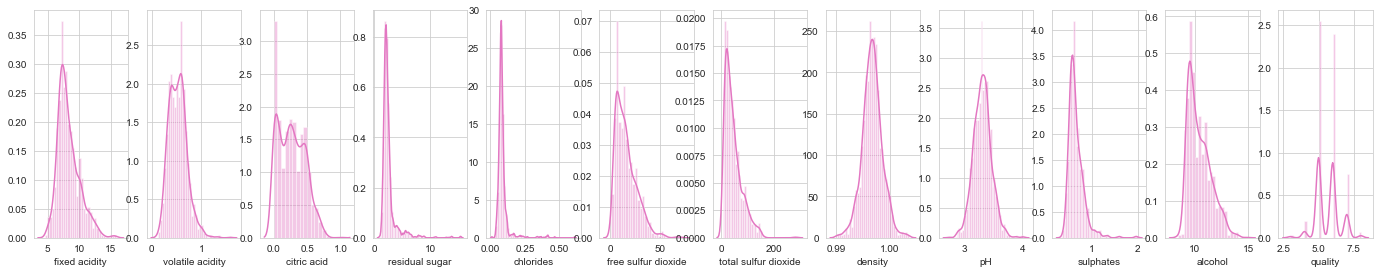

In [84]:
#Looking at our distribution 
plt.figure(figsize=(2*col_num,5*row_num))
for i in range(0,len(col_val)):
    plt.subplot(row_num + 1,col_num,i+1)
    sns.distplot(data[col_val[i]],kde=True, color= "tab:pink")

A lot of our features have right skewness with the exception of pH and density (which looks normal). Citric acid has an interesting distribution, with some of them fall close to 0.0 g/dm³, which is a very low concentration.

## <b> Correlation Between Variables </b>

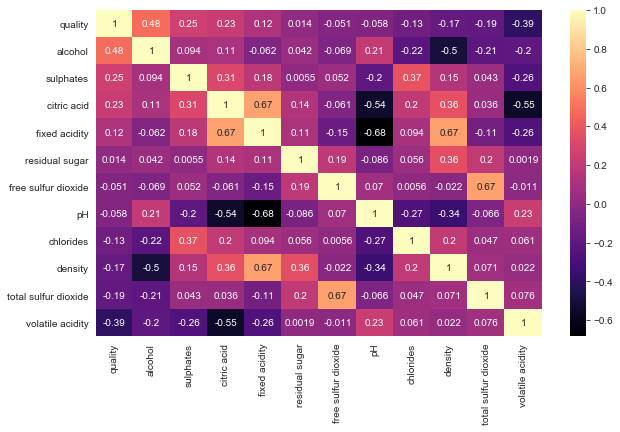

In [85]:
#Looking at how our independent variables correlate with our dataset
variables = 12 
column = data.corr().nlargest(variables, "quality")["quality"].index
conrrelation_matrix = data[column].corr()
plt.figure(figsize=(10,6))
sns.heatmap(conrrelation_matrix, annot=True, cmap = "magma")

We can see the strongest positive correlation is alcohol (0.48) with the quality. An interesting observation just based on our correlation matrix is that pH has almost 0 correlation to the quality which contradicts the belief that pH is indicative of quality. We can also see that different acids have different impact on quality. Citric acid shows a positive correlation while fixed acidity (tartaric acid) and volatile acidity (acetic acid) shows negative correlation.

So what about concentration dependence? There are a lot to say about this but let us take a look at one example: if we take a look at volatile acidity (which is acetic acid), it is the most negatively correlated to the quality. If we take a look at our table, we see that the values for upper and lower quartile is 0.64 g/L and 0.39 g/L. That is only a small change (0.25 g/L)! So we can expect that a small change of concentration of our volatile acid affect a lot on our quality.

## <b> Q3: Are there other interesting relationships? </b>

Looking back to our correlation matrix, citric and fixed acidity has a negative correlation with pH. Fixed acidity refers to tartaric acid, which is actually a very strong acid. So it makes sense that an increase of concentration would decrease the pH (the lower the pH, the more acidic it is). Additionally, let's refer back to our table, our fixed acidity has values for lower and upper quartile of 7.10 g/L and 9.2 g/L, so the range is 2.1 g/L. 

What about citric acid? While it is not as "strongly" correlated to pH as fixed acidity (-0.54 versus -0.68), our range for lower and upper quartile of citric acid is a measly 0.33 g/L. Does this mean that a very small change of our citric acid might change our pH (even though our pH range is also pretty small)? However, citric acid is also correlated with fixed acidity, does that have to do with anything in terms of wine processing?

However, volatile acidity has a positive correlation with pH, which is intriguing considering we would expect the pH to go down when the concentration of acid goes up. Let's try to use pairplot to visualize how each acid correlates with each other and the pH

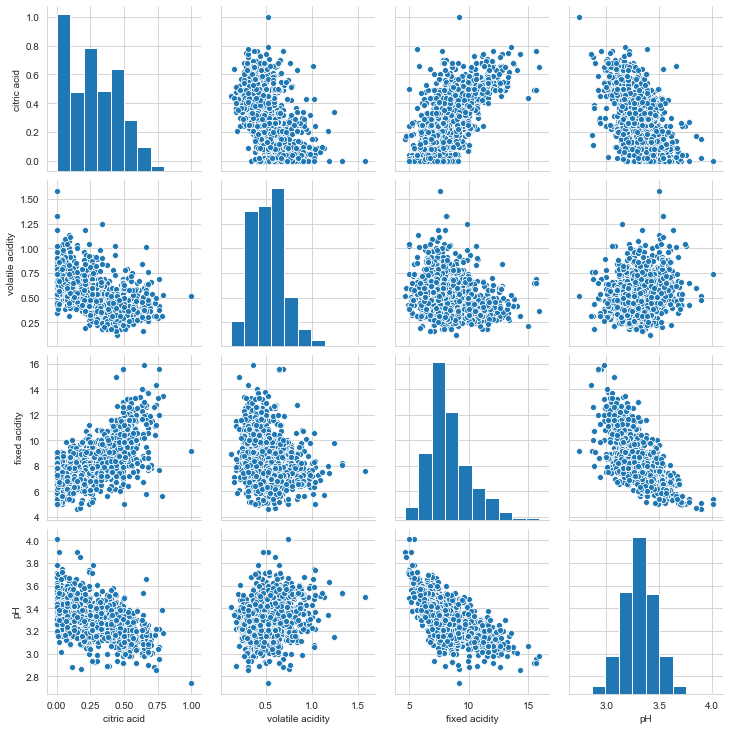

In [86]:
ph_acid= data[["citric acid", "volatile acidity", "fixed acidity", "pH"]]
sns.pairplot(ph_acid)

Remember how everything is "concentration dependent" in chemistry? Just to make sure that the fact the concentration of our data will not affect anything, we can try standardizing all of our acids:

In [87]:
acid_data= data[["citric acid", "volatile acidity", "fixed acidity"]]
pH= data["pH"]
scaler = StandardScaler()
scaled_df= scaler.fit_transform(acid_data)
scaled_acid= pd.DataFrame(scaled_df, columns= acid_data.columns)

Let's make a new variable that contains our acid data that are scaled with the pH. This will be used for our pairplot

In [88]:
new_acid_ph= pd.concat([scaled_acid, pH], axis=1)
new_acid_ph.describe()

,citric acid,volatile acidity,fixed acidity,pH
count,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,4.335355e-16,1.699704e-16,3.435512e-16,3.311113
std,1.000313e+00,1.000313e+00,1.000313e+00,0.154386
min,-1.391472e+00,-2.278280e+00,-2.137045e+00,2.740000
25%,-9.293181e-01,-7.699311e-01,-7.007187e-01,3.210000
50%,-5.636026e-02,-4.368911e-02,-2.410944e-01,3.310000
75%,7.652471e-01,6.266881e-01,5.057952e-01,3.400000
max,3.743574e+00,5.877976e+00,4.355149e+00,4.010000


Let's make our pairplot using our new variable

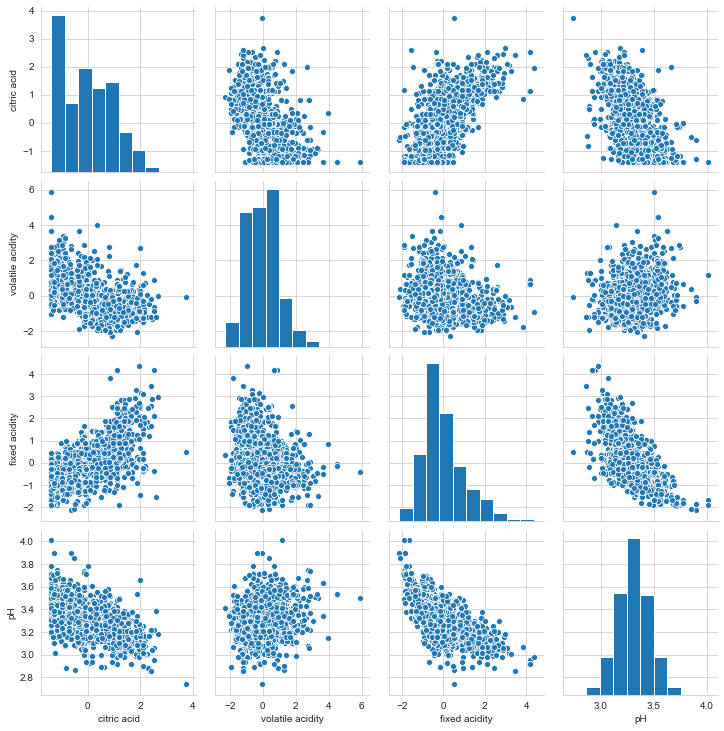

In [89]:
sns.pairplot(new_acid_ph)

No change! So we found an interesting relationship between volatile acidity and pH. 

Additionally, we see volatile acid is inversely correlated with fixed acidity and citric acid. Why is that? This might be an interesting finding to explore. Does this relate to how wine is being made? Are there any explanation in terms of chemistry that can explain this or is this just by chance? 

Just from looking at our data, we can also take consideration on how our correlated features might impact our model, how some features have no impact to our dependent variable and whether we should drop it when we try to model, and how each features have interesting correlation to one another.

## Summary

So here are some key takeaways that you can get:
- If we look at our table and box plot, our pH values fall between 2.74–4.01, which falls under "acidic" category.
50 percent of our dataset for pH falls within a very narrow range, this can be illustrated by our boxplot. Looking at our summary table, our interquartile range falls between 3.21–3.40. That's only 0.79 difference between the upper and lower quartile, very small change in pH! 
- The lack of correlation between pH and our data might have something to do with the fact that all of our dataset falls under the "acidic" category. This is why we see pH having little impact to the quality of the wine. 
- However, one interesting thing to note is that the type of acid might impact the quality of wine, this is demonstrated through our correlation matrix. 
- Volatile acidity (or acetic acid) has a negative correlation with wine. Acetic acid is the main ingredient for vinegar, it would make sense that higher concentration of acetic acid might negatively impact the taste and hence the quality.
- Despite standardizing acid data, we still don't have different result on our volatile acidity vs. pH. This is odd because the higher acid concentration we have, technically we would have lower pH. We can still argue that the range of pH still falls under "acidic" category anyway.
- Additionally, volatile acid is inversely correlated with fixed acidity and citric acid, why is that? We can also see that fixed acidity and citric acid is positively correlated to each other. Does this also explain the fact that the pH goes up when citric acid concentration goes up?
- Alcohol is the most strongly correlated with quality of wine and also inversely correlated with density. Let's try to think about this: the alcohol in wine is ethyl alcohol and it has a density of 0.7892 g/mL. On the other hand, water has a density of 1 g/mL . So our finding makes sense: the more alcohol we have, the less dense our wine will be due to the difference in density between ethyl alcohol and water.